# Material used to answer Ueta & Otsuka (2022), on the rigth way to compute extinction correction c(Hb).

Import needed libraries, instantiate needed objects

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import pyneb as pn

2023-02-08 10:41:03.162906: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/christophemorisset/anaconda3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
H1 = pn.RecAtom('H',1)
N2 = pn.Atom('N',2)
O3 = pn.Atom('O', 3)
S2 = pn.Atom('S',2)
diags = pn.Diagnostics()

## Plot Fig. 1 

Ha/Hb line ratio dependency upon the electron temperature and density. Right panel is a close-up covering the ranges for these parameters obtained for the PNe of M31. The underlying data used to draw the contours are the raw data from Storey & Hummer (1995).

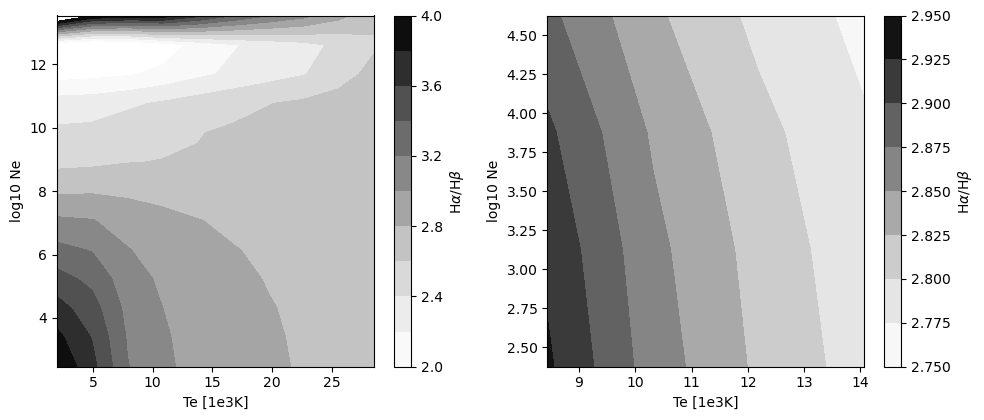

In [3]:
Hab = H1._RecombData['3_2']/H1._RecombData['4_2']
dens = H1.log_dens[:,0]
temp = H1.temp[0,:]/1e3
#print(dens, temp)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.3))
cmap = 'Greys'

extent = (np.min(temp), np.max(temp), np.min(dens), np.max(dens))
im = ax1.contourf(Hab, origin='lower', extent=extent,levels=np.linspace(2., 4.0, 11),cmap=cmap)
ax1.set_xlabel('Te [1e3K]')
ax1.set_ylabel('log10 Ne')
cb = f.colorbar(im, ax=ax1)
cb.set_label(r'H$\alpha$/H$\beta$');

N_min_dens = 0
N_max_dens = 4
N_min_temp = 4
N_max_temp = 8
Hab_red = Hab[N_min_dens:N_max_dens, N_min_temp:N_max_temp]
dens_red = dens[N_min_dens:N_max_dens]
temp_red = temp[N_min_temp:N_max_temp]
extent_red = (np.min(temp_red), np.max(temp_red), np.min(dens_red), np.max(dens_red))

im = ax2.contourf(Hab_red, origin='lower', extent=extent_red, levels=np.linspace(2.75, 2.95, 9),cmap=cmap)
ax2.set_xlabel('Te [1e3K]')
ax2.set_ylabel('log10 Ne')
cb = f.colorbar(im, ax=ax2)
cb.set_label(r'H$\alpha$/H$\beta$')
f.tight_layout()
f.savefig('./Hab.pdf')

Define dictionaries with Ha/Hb for different (Te, Ne) sets, and the observed values from Galera-Rosillo et al. (2022) and Ueta & Otsuka (2022)

In [4]:
Hab = {}
Hgb = {}
Hdb = {}
for tem in (1e4, 1.5e4):
    for den in (2.5e3, 2.5e4):
        key = f'{np.log10(tem):.1f}_{np.log10(den):.1f}'
        Hab[key] = H1.getEmissivity(tem, den, label='3_2') / H1.getEmissivity(tem, den, label='4_2')
        Hgb[key] = H1.getEmissivity(tem, den, label='5_2') / H1.getEmissivity(tem, den, label='4_2')
        Hdb[key] = H1.getEmissivity(tem, den, label='6_2') / H1.getEmissivity(tem, den, label='4_2')
        print(key)

4.0_3.4
4.0_4.4
4.2_3.4
4.2_4.4


In [5]:
Hab['GR22_2538'] = 2.79
Hgb['GR22_2538'] = 0.445
Hdb['GR22_2538'] = 0.249

Hab['GR22_1675'] = 2.86
Hgb['GR22_1675'] = 0.4630
Hdb['GR22_1675'] = 0.23

Hab['GR22_1687'] = 2.86
Hgb['GR22_1687'] = 0.478
Hdb['GR22_1687'] = 0.286

Hab['GR22_2068'] = 2.86
Hgb['GR22_2068'] = 0.458
Hdb['GR22_2068'] = 0.266

Hab['GR22_50'] = 2.86
Hgb['GR22_50'] = 0.448
Hdb['GR22_50'] = 0.259

Hab['GR22_1596'] = 2.86
Hgb['GR22_1596'] = 0.465
Hdb['GR22_1596'] = 0.269

Hab['GR22_2471'] = 2.86
Hgb['GR22_2471'] = 0.456
Hdb['GR22_2471'] = 0.267

Hab['GR22_2860'] = 2.86
Hgb['GR22_2860'] = 0.441
Hdb['GR22_2860'] = 0.26

Hab['GR22_1074'] = 2.86
Hgb['GR22_1074'] = 0.445
Hdb['GR22_1074'] = 0.246


#----------------------
Hab['UO22_2538'] = 2.16
Hgb['UO22_2538'] = 0.507
Hdb['UO22_2538'] = 0.301

Hab['UO22_1675'] = 2.30
Hgb['UO22_1675'] = 0.5170
Hdb['UO22_1675'] = 0.2593

Hab['UO22_1687'] = 2.77
Hgb['UO22_1687'] = 0.485
Hdb['UO22_1687'] = 0.293

Hab['UO22_2068'] = 2.42
Hgb['UO22_2068'] = 0.50
Hdb['UO22_2068'] = 0.30

Hab['UO22_50'] = 2.68
Hgb['UO22_50'] = 0.462
Hdb['UO22_50'] = 0.271

Hab['UO22_1596'] = 2.762
Hgb['UO22_1596'] = 0.47
Hdb['UO22_1596'] = 0.273

Hab['UO22_2471'] = 2.29
Hgb['UO22_2471'] = 0.508
Hdb['UO22_2471'] = 0.313

Hab['UO22_2860'] = 2.11
Hgb['UO22_2860'] = 0.517
Hdb['UO22_2860'] = 0.328

Hab['UO22_1074'] = 2.65
Hgb['UO22_1074'] = 0.462
Hdb['UO22_1074'] = 0.26


In [6]:
# Order of the PN for the TaTex tables and figures
keys = ['1687', '2068', '2538', '50', '1596', '2471', '2860', '1074', '1675']
marks = {'4': 'o',
        'G': 'd', 
        'U': '*'}

## Plot Fig 2

Ha/Hb, Hg/Hb and Hd/Hb line ratio in logarithmic scale, from top to bottom respectively. The first four values on each row (filled circles), correspond to the theoretical values obtained using (log Te, log Ne) = (4.0, 3.4), (4.0, 4.4), (4.2, 3.4), (4.2, 4.4) respectively. The horizontal lines correspond to the value obtained for (4.0, 3.4). The following 9 values correspond to the dereddened line ratios obtained by GR22 (diamonds) and UO22 (stars) for the 9 PNe considered in both papers. 

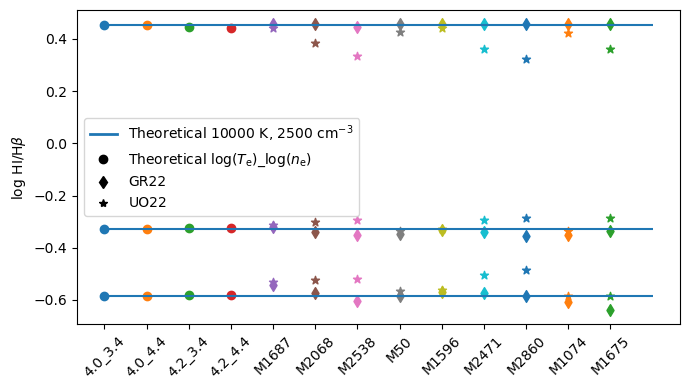

In [7]:
legend_elements=[Line2D([0],[0],lw=2, color='C0',label=r'Theoretical 10000 K, 2500 cm$^{-3}$'),
                 Line2D([0],[0], lw=0, marker='o', ms=6, color='k', label=r'Theoretical log($T_{\rm e}$)_log($n_{\rm e}$)'), 
                 Line2D([0],[0],lw=0,marker='d', ms=6, color='k',label='GR22'), 
                 Line2D([0],[0],lw=0, marker='*', ms=6, color='k', label='UO22')]

f, ax = plt.subplots(figsize=(7, 4))

for HI in (Hab, Hgb, Hdb):
    i = 0
    labels = []
    for k in ['4.0_3.4', '4.0_4.4', '4.2_3.4', '4.2_4.4']:
        ax.scatter(i, np.log10(HI[k]), c='C'+str(i),marker=marks[k[0]])
        labels.append(k)
        i += 1
    for k in keys:
        ax.scatter(i, np.log10(HI['GR22_'+k]), c='C'+str(i),marker='d')
        ax.scatter(i, np.log10(HI['UO22_'+k]), c='C'+str(i),marker='*')
        labels.append('M'+k) 
        i += 1
    ax.hlines(np.log10(HI['4.0_3.4']), xmin=0, xmax=4+len(keys))
ax.legend(handles=legend_elements, loc='center left', frameon=True)
ax.set_xticks(np.arange(0, len(labels), 1.0))
ax.set_xticklabels(labels,  rotation = 45)
ax.set_ylabel(r'log HI/H$\beta$')
f.tight_layout()
f.savefig('Compare_HI.pdf')

Define dictionnaries from the published papers

In [8]:
Te_dic = {
 'GR22_2538': 12710,
 'GR22_1675': (10550+11400)/2,
 'GR22_1687': 12710,
 'GR22_2068': (10620+10350)/2,
 'GR22_50': (11480+12750)/2,
 'GR22_1596': (11930+11700)/2,
 'GR22_2471': (11810+10930)/2,
 'GR22_2860': (10010+12540)/2,
 'GR22_1074': (11820+12820)/2,
 'UO22_2538': 12600,
 'UO22_1675': (11000+11380)/2,
 'UO22_1687': 12940,
 'UO22_2068': (11250+13020)/2,
 'UO22_50': (11670+13030)/2,
 'UO22_1596': (12030+11770)/2,
 'UO22_2471': (12380+11390)/2,
 'UO22_2860': (10660+13780)/2,
 'UO22_1074': (12110+13120)/2}

In [9]:
Ne_dic = {
 'GR22_2538': 5000,
 'GR22_1675': 8900,
 'GR22_1687': 4600,
 'GR22_2068': 35500,
 'GR22_50': 10000,
 'GR22_1596': 4750,
 'GR22_2471': 4000,
 'GR22_2860': 6300,
 'GR22_1074': 3000,
 'UO22_2538': 4000,
 'UO22_1675': 7500,
 'UO22_1687': 5000,
 'UO22_2068': 15000,
 'UO22_50': 8000,
 'UO22_1596': 4400,
 'UO22_2471': 3500,
 'UO22_2860': 4700,
 'UO22_1074': 5000}

In [10]:
Hab_red = {
 'GR22_2538': 2.79,
 'GR22_1675': 3.35,
 'GR22_1687': 3.27,
 'GR22_2068': 3.13,
 'GR22_50': 3.27,
 'GR22_1596': 3.21,
 'GR22_2471': 2.95,
 'GR22_2860': 3.06,
 'GR22_1074': 3.07}

In [11]:
TeNII_dic = {
 'GR22_2538': 11930,
 'GR22_1675': 11400,
 'GR22_1687': 12710,
 'GR22_2068': 10350,
 'GR22_50': 12750,
 'GR22_1596': 11700,
 'GR22_2471': 10930,
 'GR22_2860': 12540,
 'GR22_1074': 12820,
 'UO22_2538': 12600,
 'UO22_1675': 11380,
 'UO22_1687': 25650,
 'UO22_2068': 13020,
 'UO22_50': 13030,
 'UO22_1596': 11770,
 'UO22_2471': 11390,
 'UO22_2860': 13780,
 'UO22_1074': 13120}

In [12]:
N2Hb100_dic = {
 'GR22_1687': 27.9,
 'GR22_2068': 75.2,
 'GR22_2538': 47.0,
 'GR22_50': 71.8,
 'GR22_1596': 110.,
 'GR22_2471': 52.9,
 'GR22_2860': 33.7,
 'GR22_1074': 18.5,
 'GR22_1675': 105,
 'UO22_1687': 27,
 'UO22_2068': 63.5,
 'UO22_2538': 36.3,
 'UO22_50': 67.2,
 'UO22_1596': 105.8,
 'UO22_2471': 42.4,
 'UO22_2860':  24.8,
 'UO22_1074': 17.1,
 'UO22_1675':  84.9
}


In [13]:
NpHb_dic = {
 'GR22_1687': 3.34,
 'GR22_2068': 19.3,
 'GR22_2538': 6.43,
 'GR22_50': 9.89,
 'GR22_1596': 15.6,
 'GR22_2471': 8.35,
 'GR22_2860': 5.17,
 'GR22_1074': 2.30,
 'GR22_1675': 18.1,
 'UO22_1687': 0.97,
 'UO22_2068': 9.10,
 'UO22_2538': 4.32,
 'UO22_50': 8.70,
 'UO22_1596': 14.8,
 'UO22_2471': 5.99,
 'UO22_2860':  3.14,
 'UO22_1074': 2.06,
 'UO22_1675':  13.9
}
NpHberr_dic = {
 'GR22_1687': .34,
 'GR22_2068': 6.7,
 'GR22_2538': 1.48,
 'GR22_50': 3.22,
 'GR22_1596': 3.6,
 'GR22_2471': 2.3,
 'GR22_2860': 1.17,
 'GR22_1074': .23,
 'GR22_1675': 6.1,
 'UO22_1687': .15,
 'UO22_2068': 2.2,
 'UO22_2538': 1.04,
 'UO22_50': 1.45,
 'UO22_1596': 1.8,
 'UO22_2471': 1.38,
 'UO22_2860':  0.82,
 'UO22_1074': 0.24,
 'UO22_1675':  5.2
}
NpHa_dic = {
 'GR22_1687': 3.28,
 'GR22_2068': 19.1,
 'GR22_2538':6.48,
 'GR22_50': 9.76,
 'GR22_1596': 15.4,
 'GR22_2471': 8.24,
 'GR22_2860': 5.15,
 'GR22_1074':2.27,
 'GR22_1675': 17.9,
 'UO22_1687': 3.15,
 'UO22_2068': 10.6,
 'UO22_2538': 5.60,
 'UO22_50': 9.15,
 'UO22_1596': 15.0,
 'UO22_2471': 7.36,
 'UO22_2860': 4.23,
 'UO22_1074':2.19,
 'UO22_1675': 17.1
}

Instantiate Reddening Correction objects to compute c(Hb) under different hypothesis.

In [14]:
RC1 = pn.RedCorr(law='CCM89')
RC2 = pn.RedCorr(law='CCM89')
RC3 = pn.RedCorr(law='CCM89')

## Generate Tab 1

c(Hb) obtained using different (Te, Ne) values: Case 1: (10,000 K, 1,000 cm$^{-3}$), Case 2: using the GR22 values, Case 3: using the UO22 values.

In [15]:
Hab_theo = lambda tem, den: H1.getEmissivity(tem, den, label='3_2') / H1.getEmissivity(tem, den, label='4_2')
for k in keys:
    kG = f'GR22_{k}'
    kU = f'UO22_{k}'
    RC1.setCorr(Hab_red[kG] / Hab_theo(1e4, 1e3), 6563., 4861.)
    RC2.setCorr(Hab_red[kG] / Hab_theo(Te_dic[kG], Ne_dic[kG]), 6563., 4861.)
    RC3.setCorr(Hab_red[kG] / Hab_theo(Te_dic[kU], Ne_dic[kU]), 6563., 4861.)
    print(f'M{k:4s} & {Hab_red[kG]} & {RC1.cHbeta:5.2f} & {RC2.cHbeta:5.2f} & {RC3.cHbeta:5.2f}\\\\')

M1687 & 3.27 &  0.20 &  0.22 &  0.22\\
M2068 & 3.13 &  0.13 &  0.15 &  0.16\\
M2538 & 2.79 & -0.03 & -0.01 & -0.01\\
M50   & 3.27 &  0.20 &  0.22 &  0.22\\
M1596 & 3.21 &  0.17 &  0.19 &  0.19\\
M2471 & 2.95 &  0.05 &  0.06 &  0.07\\
M2860 & 3.06 &  0.10 &  0.12 &  0.12\\
M1074 & 3.07 &  0.10 &  0.13 &  0.13\\
M1675 & 3.35 &  0.23 &  0.25 &  0.25\\


## Plot Fig. 3

Values of 12 + log(N+/H+) obtained using the data from GR22 (diamonds) and UO22 (stars), using \Hb (large symbols) and \Ha (small black edge-colored symbols). The error bars reported by UO22 are also shown.

1687 GR22 Hb:  6.52, Ha:  6.52 +/-0.04, UO22 Hb:  6.25, Ha:  6.25 +/-0.06
2068 GR22 Hb:  7.29, Ha:  7.29 +/-0.13, UO22 Hb:  6.93, Ha:  6.99 +/-0.09
2538 GR22 Hb:  6.79, Ha:  6.79 +/-0.09, UO22 Hb:  6.64, Ha:  6.76 +/-0.09
50   GR22 Hb:  6.97, Ha:  6.97 +/-0.12, UO22 Hb:  6.92, Ha:  6.94 +/-0.07
1596 GR22 Hb:  7.20, Ha:  7.19 +/-0.09, UO22 Hb:  7.17, Ha:  7.18 +/-0.05
2471 GR22 Hb:  6.94, Ha:  6.93 +/-0.11, UO22 Hb:  6.79, Ha:  6.88 +/-0.09
2860 GR22 Hb:  6.67, Ha:  6.66 +/-0.09, UO22 Hb:  6.44, Ha:  6.57 +/-0.10
1074 GR22 Hb:  6.35, Ha:  6.34 +/-0.04, UO22 Hb:  6.30, Ha:  6.32 +/-0.05
1675 GR22 Hb:  7.24, Ha:  7.24 +/-0.13, UO22 Hb:  7.14, Ha:  7.23 +/-0.14


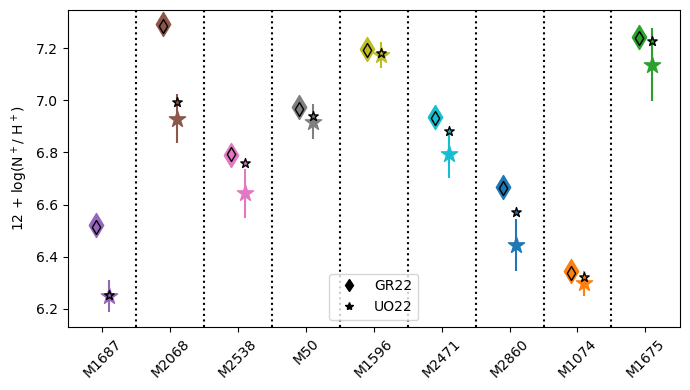

In [16]:
legend_elements=[Line2D([0],[0],lw=0,marker='d', ms=6, color='k',label='GR22'), 
                 Line2D([0],[0],lw=0, marker='*', ms=6, color='k', label='UO22')]
f, ax = plt.subplots(figsize=(7,4))
i = 0
labels = []
use_log = True

for k in keys:
    kG = f'GR22_{k}'
    kU = f'UO22_{k}'
    N2_emis_G = N2.getEmissivity(TeNII_dic[kG], Ne_dic[kG], wave=6584.)
    Ha_emis_G = H1.getEmissivity(Te_dic[kG], Ne_dic[kG], wave=6563.)
    Hb_emis_G = H1.getEmissivity(Te_dic[kG], Ne_dic[kG], wave=4861.)
    NpHpGb = N2Hb100_dic[kG] * (Hb_emis_G / N2_emis_G) / 100
    NpHpGa = N2Hb100_dic[kG] / Hab[kG]  * (Ha_emis_G / N2_emis_G)/ 100
    
    N2_emis_U = N2.getEmissivity(TeNII_dic[kU], Ne_dic[kU], wave=6584.)
    Ha_emis_U = H1.getEmissivity(Te_dic[kU], Ne_dic[kU], wave=6563.)
    Hb_emis_U = H1.getEmissivity(Te_dic[kU], Ne_dic[kU], wave=4861.)
    NpHpUb = N2Hb100_dic[kU] * (Hb_emis_U / N2_emis_U)/ 100
    NpHpUa = N2Hb100_dic[kU] / Hab[kU]  * (Ha_emis_U / N2_emis_U)/ 100

    if use_log:
        transfo = lambda x: 12 + np.log10(x)
        deltaG = np.log10((NpHb_dic[kG] + NpHberr_dic[kG])/ NpHb_dic[kG])
        deltaU = np.log10((NpHb_dic[kU] + NpHberr_dic[kU])/ NpHb_dic[kU])
        ylabel = r'12 + log(N$^+$/ H$^+$)'
    else:
        transfo = lambda x: x*1e6
        deltaG = NpHberr_dic[kG]
        deltaU = NpHberr_dic[kU]
        ylabel = r'N$^+$/ H$^+$ [1e6]'
    
    
    ax.scatter(i-0.1, transfo(NpHpGb), c='C'+str(i+4),marker='d', s=150, zorder=1)
    ax.scatter(i+0.1, transfo(NpHpUb), c='C'+str(i+4),marker='*', s=150, zorder=2)
    #ax.errorbar(i-0.1, transfo(NpHpGb), yerr=deltaG, c='C'+str(i+4))
    ax.errorbar(i+0.1, transfo(NpHpUb), yerr=deltaU, c='C'+str(i+4), zorder=3)

    ax.scatter(i-0.1, transfo(NpHpGa), c='C'+str(i+4),marker='d', s=50, edgecolors='k', zorder=4)
    ax.scatter(i+0.1, transfo(NpHpUa), c='C'+str(i+4),marker='*', s=50, edgecolors='k', zorder=5)
    if i> 0:
        ax.axvline(i-0.5, ls=':', c='k')
    labels.append('M'+k) 
    print(f'{k:4s} GR22 Hb: {transfo(NpHpGb):5.2f}, Ha: {transfo(NpHpGa):5.2f} +/-{deltaG:.2f}, UO22 Hb: {transfo(NpHpUb):5.2f}, Ha: {transfo(NpHpUa):5.2f} +/-{deltaU:.2f}')
    i += 1
    
ax.legend(handles=legend_elements, loc='lower center', frameon=True)
ax.set_xticks(np.arange(0, len(labels), 1.0))
ax.set_xticklabels(labels,  rotation = 45)
ax.set_ylabel(ylabel)
f.tight_layout()
f.savefig('Compare_Np.pdf')

## Generate Tab 2

In [17]:
def get_err(T_theo = 10000, T_real = 15000, den_theo = 1e2, den_real = 1e4):
    """
    Function to obtain the error in N+ and O++ determination
    when wrong Te and Ne are used for redenning corrections.
    T_theo = 10000 # Temperature used to compute theoraticla Ha/Hb and correct from reddening
    T_real = 15000 # Actual temperature of the nebula
    den_theo = 1e2 # density used to compute theoraticla Ha/Hb and correct from reddening
    den_real = 1e4 # Actual density of the nebula
    """
    cHb_real = 0.3 # Needed, but no effect on the result
    Opp = 1e-4 # Actual O++/H+ abundance
    Np = 1e-4 # Actual N+/H+ abundance
    Sp = 1e-4 # Actual S+/H+ abundance

    # Real redenning applied to observations
    RC_real = pn.RedCorr(law='CCM89', cHbeta=cHb_real)

    # Compute the real emission of lines, using T_real and den_real 
    em_Ha = H1.getEmissivity(T_real, den_real,label='3_2')
    em_Hb = H1.getEmissivity(T_real, den_real,label='4_2')
    em_5007 = Opp * O3.getEmissivity(T_real, den_real, wave=5007)
    em_4363 = Opp * O3.getEmissivity(T_real, den_real, wave=4363)
    em_6584 = Np * N2.getEmissivity(T_real, den_real, wave=6584)
    em_5755 = Np * N2.getEmissivity(T_real, den_real, wave=5755)
    em_6716 = Sp * S2.getEmissivity(T_real, den_real, wave=6716)
    em_6731 = Sp * S2.getEmissivity(T_real, den_real, wave=6731)

    # Apply reddening using real cHbeta
    em_Ha_obs = em_Ha / RC_real.getCorr(6563)
    em_Hb_obs = em_Hb / RC_real.getCorr(4861)
    em_5007_obs = em_5007 / RC_real.getCorr(5007)
    em_4363_obs = em_4363 / RC_real.getCorr(4363)
    em_6584_obs = em_6584 / RC_real.getCorr(6584)
    em_5755_obs = em_5755 / RC_real.getCorr(5755)
    em_6716_obs = em_6716 / RC_real.getCorr(6716)
    em_6731_obs = em_6731 / RC_real.getCorr(6731)
    
    # Obtain the observed Ha/Hb line ratio
    Hab_obs = em_Ha_obs / em_Hb_obs
    
    # Compute the theoretical Ha/Hb, using T_theo and den_theo
    Hab_th = H1.getEmissivity(T_theo, den_theo,label='3_2') / H1.getEmissivity(T_theo, den_theo,label='4_2')
    
    # Compute the reddening correction from the observed Ha/Hb and the theoratical Ha/Hb
    RC_obs = pn.RedCorr(law='CCM89')
    RC_obs.setCorr(Hab_obs / Hab_th, 6563., 4861.)

    # Correct the observations from reddening
    em_Ha_cor = em_Ha_obs * RC_obs.getCorr(6563)
    em_Hb_cor = em_Hb_obs * RC_obs.getCorr(4861)
    em_5007_cor = em_5007_obs * RC_obs.getCorr(5007)
    em_4363_cor = em_4363_obs * RC_obs.getCorr(4363)
    em_6584_cor = em_6584_obs * RC_obs.getCorr(6584)
    em_5755_cor = em_5755_obs * RC_obs.getCorr(5755)
    em_6716_cor = em_6716_obs * RC_obs.getCorr(6716)
    em_6731_cor = em_6731_obs * RC_obs.getCorr(6731)

    # Compute temperature and density from corrected line ratios
    T_obs, den_obs = diags.getCrossTemDen('[OIII] 4363/5007', 
                                          '[SII] 6731/6716', 
                                          value_tem=em_4363_cor / em_5007_cor, 
                                          value_den=em_6731_cor / em_6716_cor)
    # Compute the O++ abundance from the corrected line ratios and the previously obtained Te and Ne
    Opp_obs = O3.getIonAbundance(em_5007_cor / em_Hb_cor * 100, T_obs, den_obs, wave=5007)
    
    # The same for N+
    T_obs, den_obs = diags.getCrossTemDen('[NII] 5755/6584', 
                                          '[SII] 6731/6716', 
                                          value_tem=em_5755_cor / em_6584_cor, 
                                          value_den=em_6731_cor / em_6716_cor)
    Np_obs = N2.getIonAbundance(em_6584_cor/em_Hb_cor*100, T_obs, den_obs, wave=6584)
    # return relative errors on N+ and O++ in %
    return (Np_obs - Np) / Np * 100, (Opp_obs - Opp) / Opp * 100

Percentage errors on the determination of N+/H+ and O++/H+ when wrong electron temperature and density are used to compute the reddening correction.

In [18]:
for T_r in (5000, 8000, 10000, 12000, 15000, 20000):
    for den_r in (1e2, 1e3, 1e4):
        err_Np, err_Opp = get_err(T_theo = 10000, T_real = T_r, den_theo = 1e3, den_real = den_r)
        print(f'{T_r:5.0f} & {np.log10(den_r):.0f} & {err_Np:5.1f} & {err_Opp:5.1f}\\\\')

 5000 & 2 &  -8.2 &  -4.4\\
 5000 & 3 &  -7.7 &  -4.0\\
 5000 & 4 &  -6.5 &  -3.5\\
 8000 & 2 &  -2.8 &  -1.6\\
 8000 & 3 &  -2.4 &  -1.2\\
 8000 & 4 &  -1.8 &  -0.9\\
10000 & 2 &  -0.4 &  -0.2\\
10000 & 3 &   0.0 &   0.1\\
10000 & 4 &   0.4 &   0.3\\
12000 & 2 &   1.3 &   0.9\\
12000 & 3 &   1.7 &   0.9\\
12000 & 4 &   2.2 &   1.2\\
15000 & 2 &   3.5 &   2.1\\
15000 & 3 &   3.9 &   2.3\\
15000 & 4 &   4.3 &   2.3\\
20000 & 2 &   6.1 &   3.7\\
20000 & 3 &   6.4 &   3.8\\
20000 & 4 &   6.8 &   3.8\\
